In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [3]:
poweroverr = np.load("../data/poweroverr.npz")
poweroveromega = np.load("../data/poweroveromega.npz")
totalfield = np.load("../data/totalfield.npz")

poweroverrnorm = np.load("../data/poweroverrnorm.npz")
poweroveromeganorm = np.load("../data/poweroveromeganorm.npz")
totalfieldnorm = np.load("../data/totalfieldnorm.npz")

poweroveromega3EP = np.load("../data/poweroveromega3EP.npz")
poweroveromega3EPss = np.load("../data/poweroveromega3EPss.npz")
totalfield3EP = np.load("../data/totalfield3EP.npz")
searchmap3EP = np.load("../data/searchmap3EP.npz")

### 2 scatterers - total field

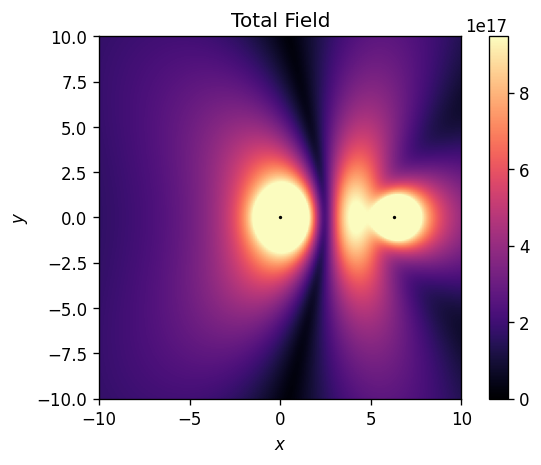

In [6]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfield.npz")["scattpos"]

xx = totalfield["xx"]
yy = totalfield["yy"]
phitot = totalfield["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()

### 2 scatterers - output power over r

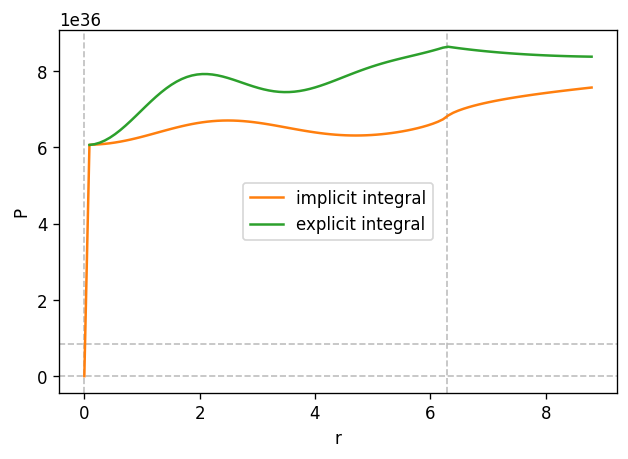

In [7]:
plt.figure(dpi=120)

scattpos = poweroverr["scattpos"]

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(-poweroverr["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(poweroverr["r"], poweroverr["P"], label="implicit integral", color="C1")
plt.plot(poweroverr["r"], poweroverr["Pexpl"], label="explicit integral", color="C2")

plt.xlabel("r")
plt.ylabel("P")
plt.legend()

### 2 scatterers - output power over omega - EP

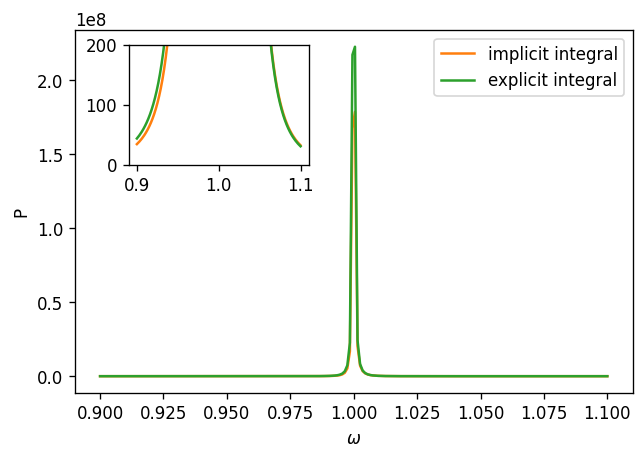

In [8]:
# here, the eigenvalues go to zero AND the eigenvectors coalesce

fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 200);

### 2 scatterers (normalized) - total field

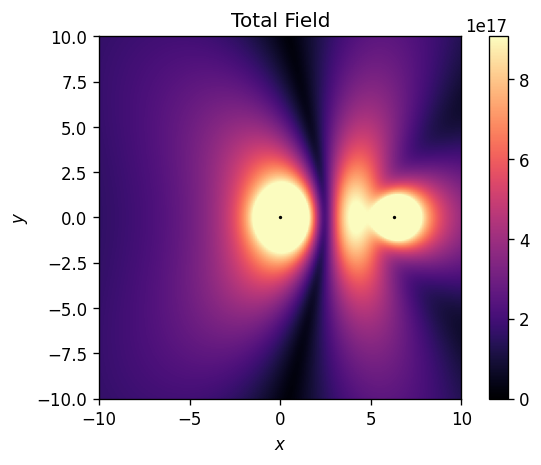

In [9]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfieldnorm.npz")["scattpos"]

xx = totalfieldnorm["xx"]
yy = totalfieldnorm["yy"]
phitot = totalfieldnorm["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()

### 2 scatterers (normalized) - output power over r

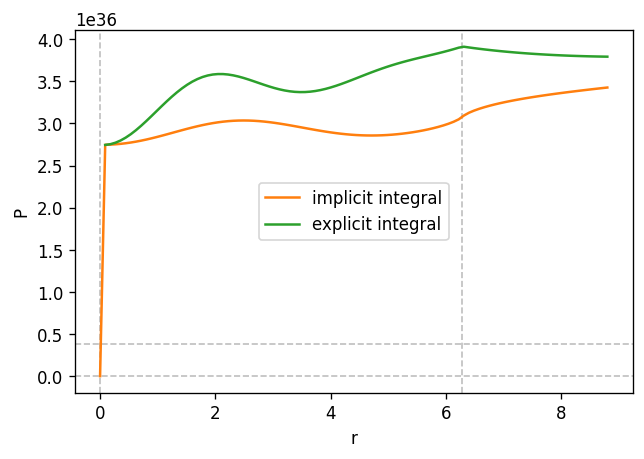

In [10]:
plt.figure(dpi=120)

scattpos = poweroverrnorm["scattpos"]

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(-poweroverrnorm["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(poweroverrnorm["r"], poweroverrnorm["P"], label="implicit integral", color="C1")
plt.plot(poweroverrnorm["r"], poweroverrnorm["Pexpl"], label="explicit integral", color="C2")

plt.xlabel("r")
plt.ylabel("P")
plt.legend()

### 2 scatterers (normalized) - output power over omega - NO EP!

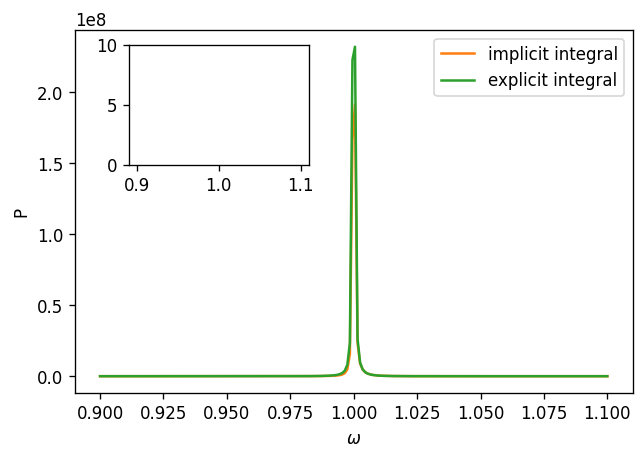

In [11]:
fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 10);

### 2 scatterers - total field - comparison

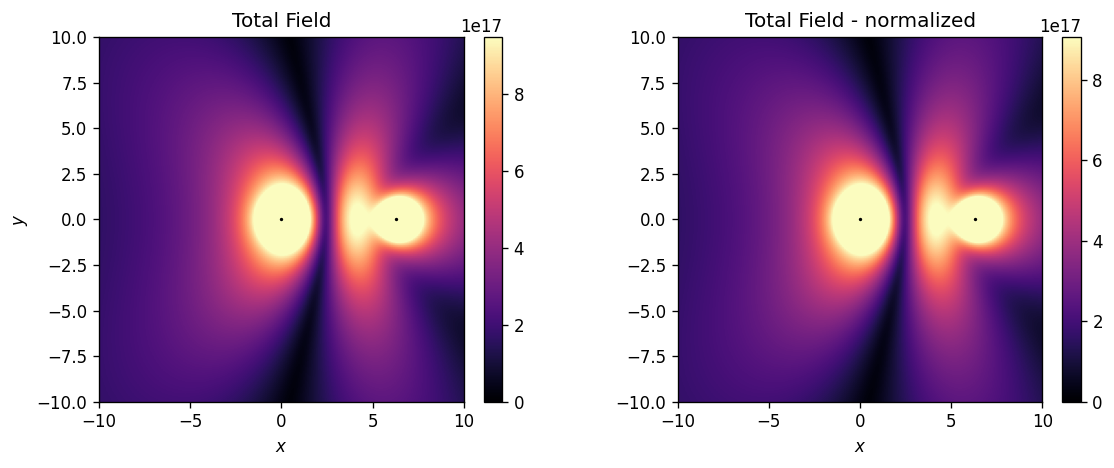

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfield.npz")["scattpos"]
xx = totalfield["xx"]
yy = totalfield["yy"]
phitot = totalfield["phitot"]
for i in range(scattpos.shape[0]):
    ax[0].scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
im0 = ax[0].imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
im0.set_clim(0, np.max(np.abs(phitot))/30)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("Total Field")

scattpos = np.load("../data/totalfieldnorm.npz")["scattpos"]
xx = totalfieldnorm["xx"]
yy = totalfieldnorm["yy"]
phitot = totalfieldnorm["phitot"]
for i in range(scattpos.shape[0]):
    ax[1].scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
im1 = ax[1].imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
im1.set_clim(0, np.max(np.abs(phitot))/30)
ax[1].set_xlabel("$x$")
ax[1].set_title("Total Field - normalized")

fig.tight_layout()
plt.show()

### 2 scatterers - output power over r - comparison

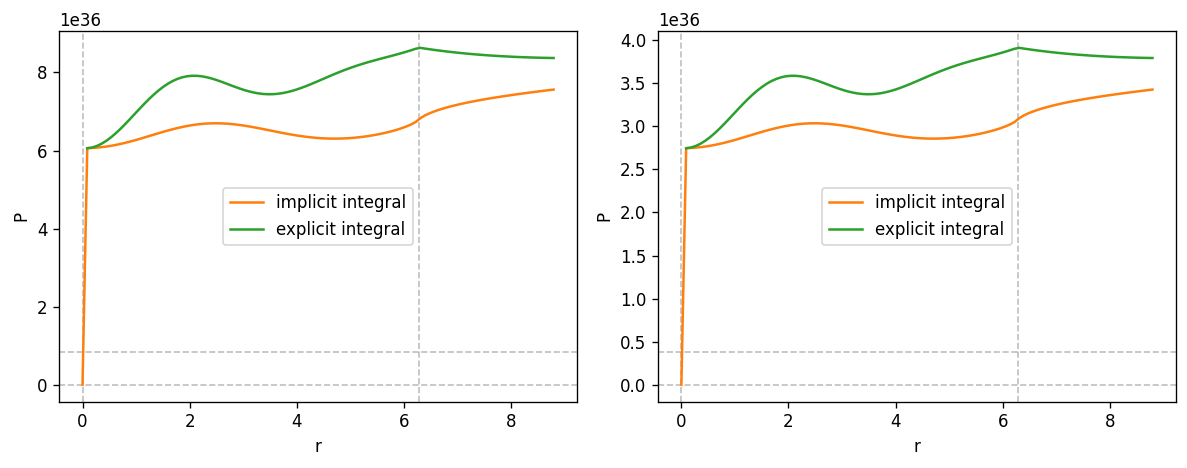

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

scattpos = poweroverr["scattpos"]
for i in range(scattpos.shape[0]):
    ax[0].axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    ax[0].axhline(-poweroverr["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
ax[0].plot(poweroverr["r"], poweroverr["P"], label="implicit integral", color="C1")
ax[0].plot(poweroverr["r"], poweroverr["Pexpl"], label="explicit integral", color="C2")
ax[0].set_xlabel("r")
ax[0].set_ylabel("P")
ax[0].legend()

scattpos = poweroverrnorm["scattpos"]
for i in range(scattpos.shape[0]):
    ax[1].axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    ax[1].axhline(-poweroverrnorm["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
ax[1].plot(poweroverrnorm["r"], poweroverrnorm["P"], label="implicit integral", color="C1")
ax[1].plot(poweroverrnorm["r"], poweroverrnorm["Pexpl"], label="explicit integral", color="C2")
ax[1].set_xlabel("r")
ax[1].set_ylabel("P")
ax[1].legend()

plt.tight_layout()
plt.show()

### 2 scatterers - output power over omega - comparison

/tmp/ipykernel_15156/3163246847.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


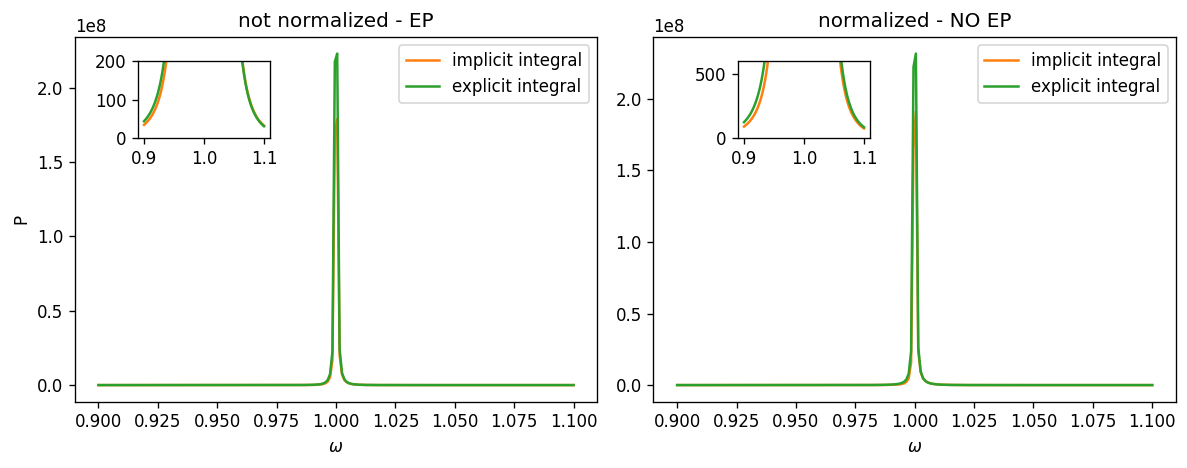

In [20]:
# this plots show the power over omega SKIPPING the exact point of divergence 

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

ax[0].plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax[0].plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax[0].set_title("not normalized - EP")
ax[0].set_xlabel("$\\omega$")
ax[0].set_ylabel("P")
ax[0].legend()
ax_in = fig.add_axes([0.12, 0.7, 0.11, 0.16])
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 200)

ax[1].plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax[1].plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax[1].set_title("normalized - NO EP")
ax[1].set_xlabel("$\\omega$")
ax[1].legend()
ax_in = fig.add_axes([0.62, 0.7, 0.11, 0.16])
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 600)

plt.tight_layout()
plt.show()

### 3 scatterers - total field

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

giff = np.load("../gif/gif1.npz")

scattpos = giff["scattpos"]
xx = giff["xx"]
yy = giff["yy"]
phitot = giff["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()

### 3 scatterers - total field aniimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [ ]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

omegaspan = np.load("../gif/gif1.npz")["omegaspan"]
phiinput = np.load("../gif/gif1.npz")["phiinput"]
scattpos = np.load("../gif/gif1.npz")["scattpos"]
xx = np.load("../gif/gif1.npz")["xx"]
yy = np.load("../gif/gif1.npz")["yy"]
phitot = np.load("../gif/gif1.npz")["phitot"]

ngiff = 200
giff = np.zeros((ngiff, np.size(xx), np.size(yy)))
for i in range(ngiff):
    giff[i] = abs(np.load("../gif/gif"+str(i+1)+".npz")["phitot"])
for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
# y_init_points, = plt.plot(scattpos[0, 0], scattpos[0, 1], marker='.', markersize=1.5, c='k')
y_init = plt.imshow(giff[0], origin="lower",
                          extent=(xx[0], xx[-1], yy[0], yy[-1]),
                          cmap="magma", aspect=1)
time_init = plt.text(-5, -8, "t = 0", c='w')
omegaspan_init = plt.text(2, -8, "$\omega$ = "+str(omegaspan[0]), c='w')
plt.clim(0, np.max(giff[int(ngiff/2)])/2000)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

n_frames = ngiff
def animate(i):
    i_time = int(i/n_frames*100)
    # y_init_points.set_data(scatterer_locations[0, 0, 3400]+(scatterer_locations[0, 0, 3400 + i]-scatterer_locations[0, 0, 3400])*10, scatterer_locations[0, 1, 3400 + i])
    y_init.set_data(giff[i])
    time_init.set_text("t = {0:d}".format(i_time))
    omegaspan_init.set_text("$\omega$ = {0:.3f}".format(omegaspan[i]))
    # return y_init_points, y_init, time_init
    return y_init, time_init, omegaspan_init

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=False)
plt.show()

writer = animation.PillowWriter(fps=30)
# writer.setup(fig, "animation.gif", dpi=100)
_animation.save("animation.gif", writer=writer, dpi="figure")

### 3 scatterers - output power over omega - EP

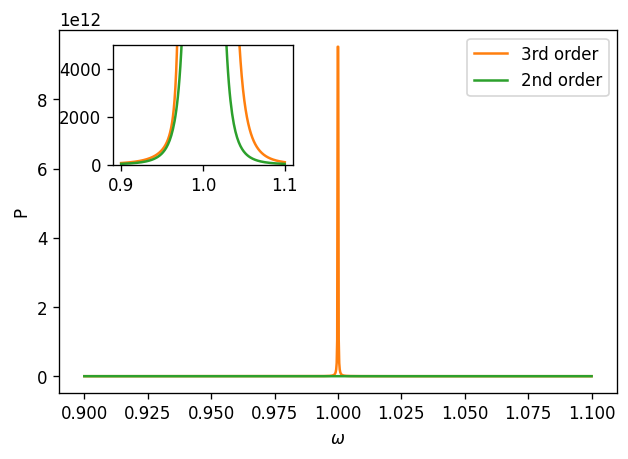

In [63]:
# here, the eigenvalues go to zero AND the eigenvectors coalesce

fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromega3EPss["omega"], poweroveromega3EPss["P"], label='3rd order', color="C1")
ax.plot(poweroveromega["omega"], poweroveromega["P"], label="2nd order", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromega3EP["omega"], poweroveromega3EP["P"], color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], color="C2")
ax_in.set_ylim(0, 5000);

### 3 scatterers - search peak map

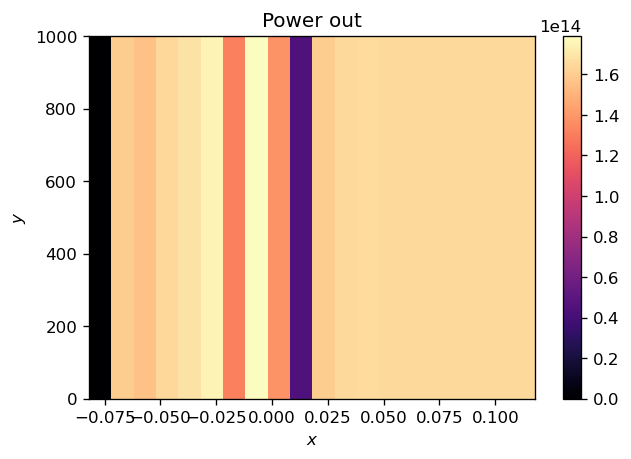

In [57]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

xx = searchmap3EP["xx"]
yy = searchmap3EP["yy"]
mapp = searchmap3EP["map"]

plt.imshow(mapp,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           aspect='auto')

plt.colorbar()
plt.clim(0, np.max(mapp))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Power out")

plt.show()